**Initial Data Analysis (Include 3 columns)**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.signal import periodogram
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# Load the dataset
file_path = 'cpu_util.csv'
df_initial = pd.read_csv(file_path, parse_dates=['timestamp'])
# Set the timestamp column as the index
df_initial.set_index('timestamp', inplace=True)

In [ ]:
df_initial.head()

,min cpu,max cpu,avg cpu
timestamp,,,
2017-01-01 00:00:00,715146.536821,2.223302e+06,1.229569e+06
2017-01-01 00:05:00,700473.840324,2.212393e+06,1.211322e+06
2017-01-01 00:10:00,705953.565850,2.213057e+06,1.206635e+06
2017-01-01 00:15:00,688383.073221,2.187572e+06,1.190369e+06
2017-01-01 00:20:00,688276.551033,2.183684e+06,1.180992e+06


In [ ]:
# Overview of the dataset
print("Dataset Overview:")
print(df_initial.info())
print(df_initial.describe())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8640 entries, 2017-01-01 00:00:00 to 2017-01-30 23:55:00
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   min cpu  8640 non-null   float64
 1   max cpu  8640 non-null   float64
 2   avg cpu  8640 non-null   float64
dtypes: float64(3)
memory usage: 270.0 KB
None
            min cpu       max cpu       avg cpu
count  8.640000e+03  8.640000e+03  8.640000e+03
mean   7.075603e+05  2.205312e+06  1.215661e+06
std    5.372051e+04  1.723607e+05  1.096154e+05
min    5.862266e+05  1.823027e+06  9.786379e+05
25%    6.675541e+05  2.072256e+06  1.125854e+06
50%    7.050560e+05  2.196693e+06  1.210631e+06
75%    7.411543e+05  2.330497e+06  1.298056e+06
max    1.151024e+06  3.529283e+06  1.821756e+06


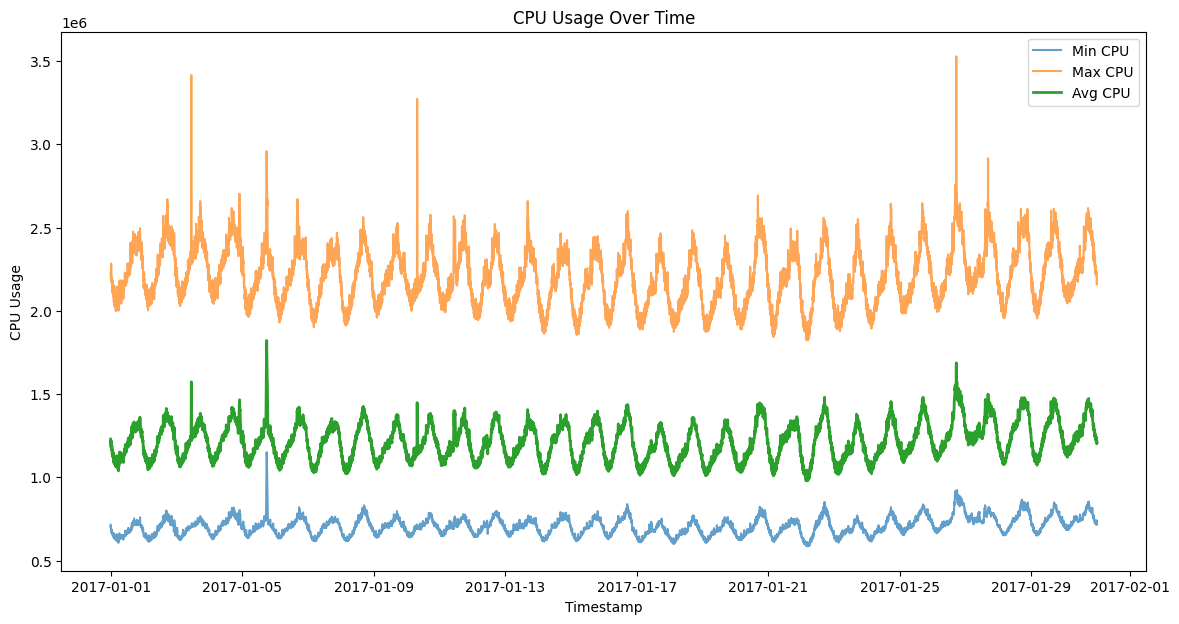

In [ ]:
# 1. Time Series Visualization
plt.figure(figsize=(14, 7))
plt.plot(df_initial.index, df_initial['min cpu'], label='Min CPU', alpha=0.7)
plt.plot(df_initial.index, df_initial['max cpu'], label='Max CPU', alpha=0.7)
plt.plot(df_initial.index, df_initial['avg cpu'], label='Avg CPU', linewidth=2)
plt.xlabel('Timestamp')
plt.ylabel('CPU Usage')
plt.title('CPU Usage Over Time')
plt.legend()
plt.show()


In [ ]:
# 2. Statistical Analysis
print("\nStatistical Analysis:")
print(df_initial[['min cpu', 'max cpu', 'avg cpu']].describe())


Statistical Analysis:
            min cpu       max cpu       avg cpu
count  8.640000e+03  8.640000e+03  8.640000e+03
mean   7.075603e+05  2.205312e+06  1.215661e+06
std    5.372051e+04  1.723607e+05  1.096154e+05
min    5.862266e+05  1.823027e+06  9.786379e+05
25%    6.675541e+05  2.072256e+06  1.125854e+06
50%    7.050560e+05  2.196693e+06  1.210631e+06
75%    7.411543e+05  2.330497e+06  1.298056e+06
max    1.151024e+06  3.529283e+06  1.821756e+06


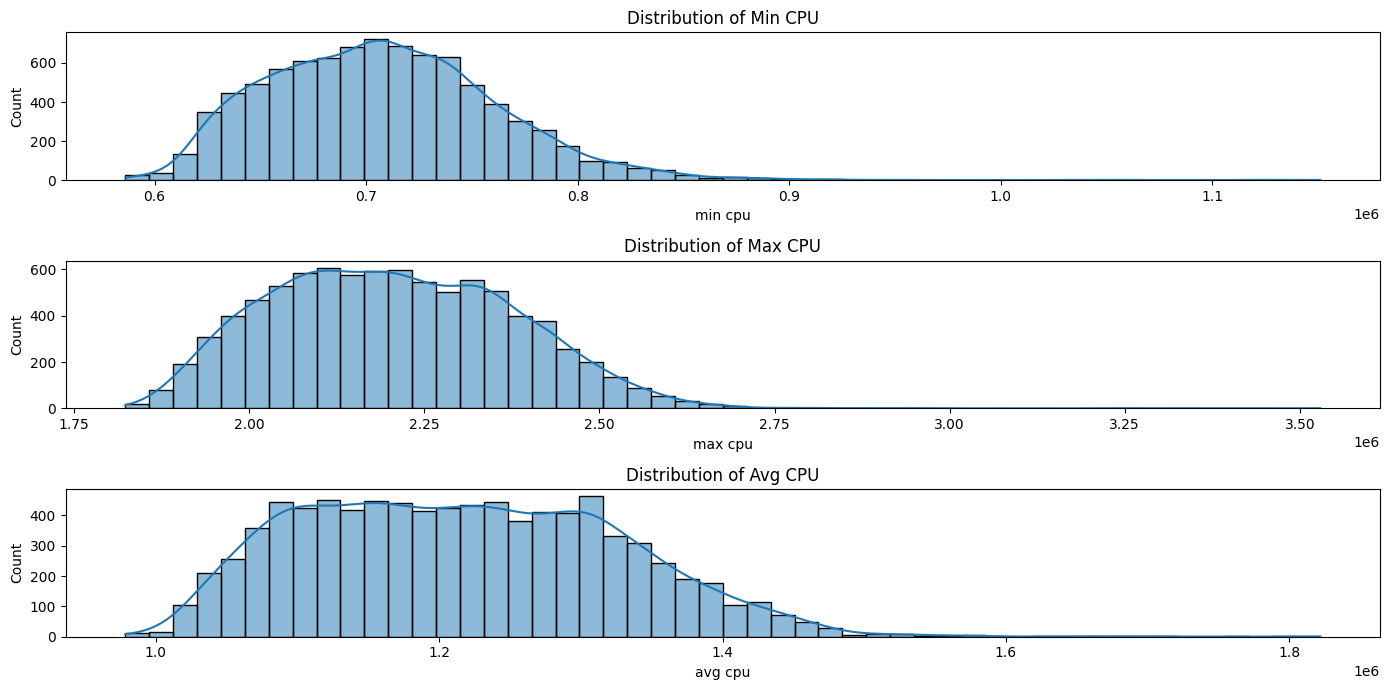

In [ ]:
# Distribution Plots
plt.figure(figsize=(14, 7))

plt.subplot(3, 1, 1)
sns.histplot(df_initial['min cpu'], bins=50, kde=True)
plt.title('Distribution of Min CPU')

plt.subplot(3, 1, 2)
sns.histplot(df_initial['max cpu'], bins=50, kde=True)
plt.title('Distribution of Max CPU')

plt.subplot(3, 1, 3)
sns.histplot(df_initial['avg cpu'], bins=50, kde=True)
plt.title('Distribution of Avg CPU')

plt.tight_layout()
plt.show()


Correlation Matrix:
          min cpu   max cpu   avg cpu
min cpu  1.000000  0.885243  0.958884
max cpu  0.885243  1.000000  0.967936
avg cpu  0.958884  0.967936  1.000000


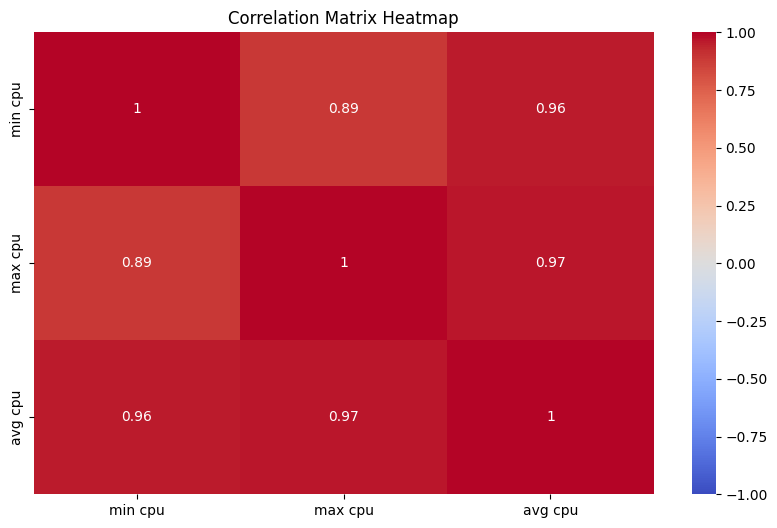

In [ ]:
# 3. Correlation Analysis
correlation_matrix = df_initial[['min cpu', 'max cpu', 'avg cpu']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Correlation Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Justification for using only avg_cpu
print("\nJustification for using avg_cpu:")
print("""
The 'avg cpu' column represents the average CPU usage, which provides a more stable and representative measure of CPU utilization over time.
While 'min cpu' and 'max cpu' show the extremes, these values can be subject to short-term fluctuations and may not reflect the typical load
patterns accurately. By focusing on 'avg cpu', we aim to model and predict the overall CPU usage trends more effectively, avoiding the noise
and variability associated with the minimum and maximum values.
""")


Justification for using avg_cpu:

The 'avg cpu' column represents the average CPU usage, which provides a more stable and representative measure of CPU utilization over time.
While 'min cpu' and 'max cpu' show the extremes, these values can be subject to short-term fluctuations and may not reflect the typical load
patterns accurately. By focusing on 'avg cpu', we aim to model and predict the overall CPU usage trends more effectively, avoiding the noise
and variability associated with the minimum and maximum values.

